In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
from scipy.linalg import null_space
import math

from utils import *

%matplotlib inline

In [2]:
def simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0):#, weights_n, weights_e, weights_f):
    return omega_0-a*(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.sin(B1.dot(theta)))
#     return omega_0-a*np.diag(we).dot(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.diag(wf).dot(np.sin(B1.dot(theta))))

def integrate_simplicial_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0):#, weights_n, weights_e, weights_f):
    return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)
#     return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0, degree, weights_n, weights_e, weights_f), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)

In [3]:
def ntri(A):
    # signed incidence matrices for triangles
    Nn=A.shape[0]
    Ne=int(np.sum(A)/2)
    #print Nn, Ne

    e=np.zeros((Ne,2))
    count=0;
    for i in range(Nn):
        for j in range(i+1,Nn):
            if(A[i,j]>0):
                e[count,0]=i
                e[count,1]=j
                count+=1
    print "edges"
    print e
    I=np.zeros((Ne,Nn))
    for i in range(Ne):
        I[i,int(e[i,0])]=1
        I[i,int(e[i,1])]=-1
    #print I

    Nf=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    Nf+=1
    f=np.zeros((Nf,3))
    count=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    f[count,0]=i
                    f[count,1]=j
                    f[count,2]=k
                    count+=1
    print "faces"
    print f
    II=np.zeros((Nf,Ne))
    for i in range(f.shape[0]):
        for j in [0,-1,-2]:
            temp=np.roll(f[i,:],j)
            temp=temp[0:2]
            for k in range(e.shape[0]):
                #print e[k,:],temp
                if(((e[k,:]==temp).all())or((e[k,:]==np.roll(temp,1)).all())):
                    Irow=k
            if(temp[0]<temp[1]):
                II[i,Irow]=1
            else:
                II[i,Irow]=-1
    #print II 
    ntrie=np.sum(II,1)
    return I,II#,ntrie, e#, len(ntrie)

In [4]:
def plotflow(theta_0,B0,B1,plotname):
    print(plotname)
    omega_0=np.ones(Ne)*0
    degree=np.absolute(B0).sum(0)
    a=1
    t_max = 110 #integration time
    n_t = 200 #number of timepoints 

    result=integrate_simplicial_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0)
    times = result.t
    theta = result.y
    
    plt.figure()
    plt.imshow(np.mod(np.around(theta,10),np.around(2*np.pi,10)), aspect='auto',cmap='bwr')
    plt.title(plotname+' phases')
    plt.colorbar()
    
    op=order_parameter(theta, 4, 1)
    plt.figure()
    plt.title(plotname+' order parameter')
    plt.plot(op[0,:])

    print('\theta_0: ', theta_0)
    print('\theta_final: ',theta[:,-1])
    
    Div=np.mod(np.around(B0.T.dot(theta),10),np.around(2*np.pi,10))
    Curl=np.mod(np.around(B1.dot(theta),10),np.around(2*np.pi,10))
    print('Div: ', Div[:,-1])
    print('Curl: ', Curl[:,-1])
    
    L1=-B0.dot(B0.T)-B1.T.dot(B1)
    print('L1\theta: ', L1.dot(theta[:,-1]))
    print('L1\theta: ', np.mod(np.around(L1.dot(theta[:,-1]),10),np.around(2*np.pi,10)))
    print('dim(Ker(L1)): ', null_space(L1).shape[1])
    print('Ker(L1): ', null_space(L1))
    
#     plt.figure()
#     plt.imshow(Div, aspect='auto',cmap='bwr')
#     plt.title(plotname+' divergence')
#     plt.colorbar()
#     plt.figure()
#     plt.imshow(Curl, aspect='auto',cmap='bwr')
#     plt.title(plotname+' curl')
#     plt.colorbar()
    return theta[:,-1]

edges
[[0. 1.]
 [0. 3.]
 [1. 2.]
 [2. 3.]]
faces
[]
One opposite orientation
('\theta_0: ', array([3.80255232, 0.0579362 , 0.18561471, 0.73640704]))
('\theta_final: ', array([ 5.87904845,  0.40413686, -0.40413686, -0.40413686]))
('Div: ', array([0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([-1.25663706e+01, -6.28318531e+00,  6.28318531e+00, -3.06976666e-14]))
('L1\theta: ', array([0., 0., 0., 0.]))
('dim(Ker(L1)): ', 1)
('Ker(L1): ', array([[-0.5],
       [ 0.5],
       [-0.5],
       [-0.5]]))
All same orientations
('\theta_0: ', array([3.80255232, 0.0579362 , 0.18561471, 0.73640704]))
('\theta_final: ', array([ 5.90801655, -0.37516876, -0.37516876, -0.37516876]))
('Div: ', array([0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([-1.25663706e+01,  6.28318531e+00,  6.28318531e+00, -8.32667268e-15]))
('L1\theta: ', array([0., 0., 0., 0.]))
('dim(Ker(L1)): ', 1)
('Ker(L1): ', array([[-0.5],
       [-0.5],
       [-0.5],
       [-0

array([ 6.08111688, -0.20206843, -0.20206843, -0.20206843])

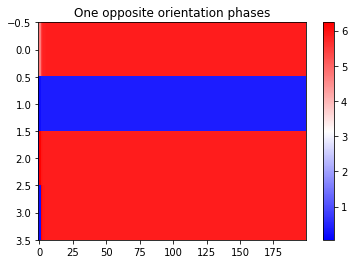

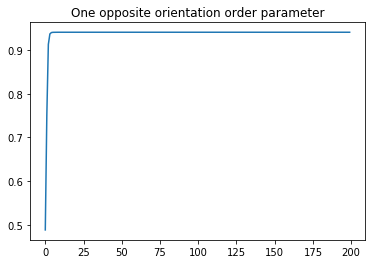

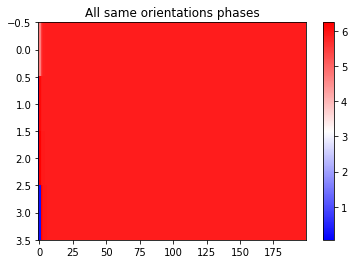

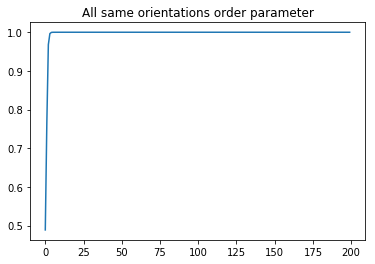

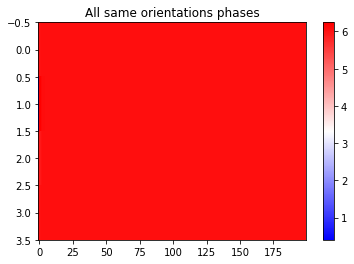

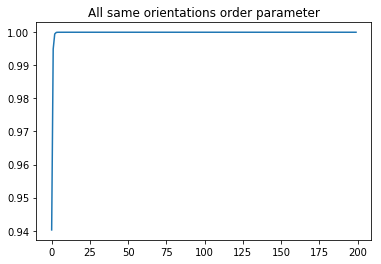

In [5]:
# cycle graph
Nn=4

G=nx.cycle_graph(Nn)

A=nx.to_numpy_matrix(G)

B0,B1=ntri(A)

Nn=B0.shape[1]
Ne=B0.shape[0]
Nf=B1.shape[0]

# inital conditions
# np.random.seed(seed=4444)
theta_0=2*np.pi*np.random.rand(Ne)
# theta_0=(np.random.rand(Ne)-0.5)*10

theta_final=plotflow(theta_0,B0,B1,'One opposite orientation')

# reverse the orientation of the odd one out
B0[1,0]=-B0[1,0]
B0[1,-1]=-B0[1,-1]

plotflow(theta_0,B0,B1,'All same orientations')
plotflow(theta_final,B0,B1,'All same orientations') #to check that the stationary state with the odd one out is unstable for the all the same

1++ 3+-, d+
1++ 3+-, d+
('\theta_0: ', array([-0.14296241,  2.46355744, -1.47498715,  4.69571841, -2.25761975]))
('\theta_final: ', array([-0.78539816,  2.35619449, -0.78539816,  3.92699082, -1.57079633]))
('Div: ', array([0., 0., 0., 0.]))
('Curl: ', array([0., 0.]))
('L1\theta: ', array([-4.35207426e-14, -6.28318531e+00,  6.28318531e+00, -1.25663706e+01,
        6.28318531e+00]))
('L1\theta: ', array([0., 0., 0., 0., 0.]))
('dim(Ker(L1)): ', 0)
('Ker(L1): ', array([], shape=(5, 0), dtype=float64))
1+- 3+-, d+
1+- 3+-, d+
('\theta_0: ', array([-0.14296241,  2.46355744, -1.47498715,  4.69571841, -2.25761975]))
('\theta_final: ', array([-1.34488719e-04,  6.28279294e+00, -1.04470579e-04,  6.28288052e+00,
       -2.00315871e-04]))
('Div: ', array([5.75579000e-05, 3.00181000e-05, 0.00000000e+00, 6.28309773e+00]))
('Curl: ', array([6.28314666e+00, 1.12739800e-04]))
('L1\theta: ', array([ 6.28319641, -6.28315291,  6.28319393, -6.28316014, 12.56638715]))
('L1\theta: ', array([1.11036e-05, 3.2

array([ 1.57079633,  1.57079633, -1.57079633,  4.71238898, -3.14159265])

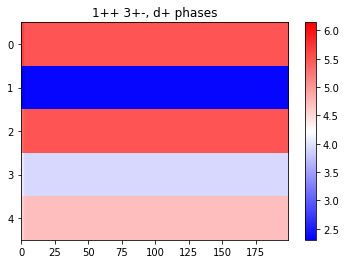

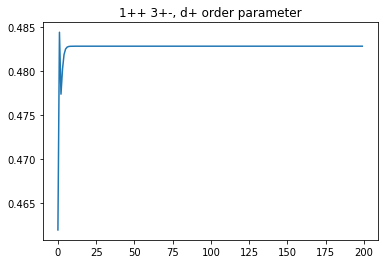

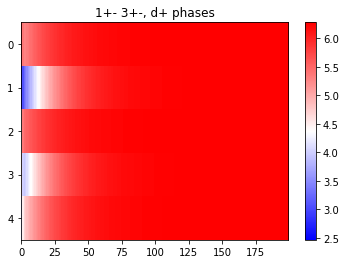

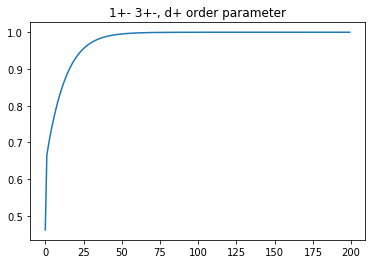

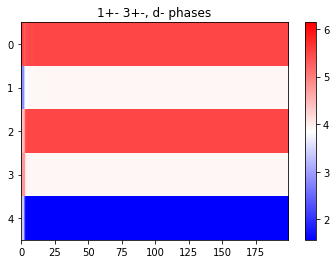

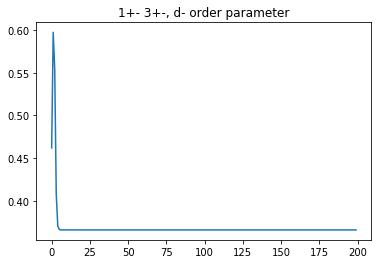

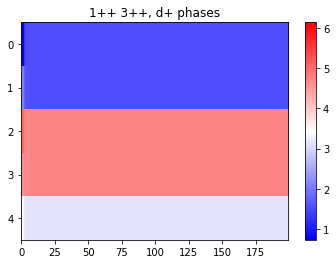

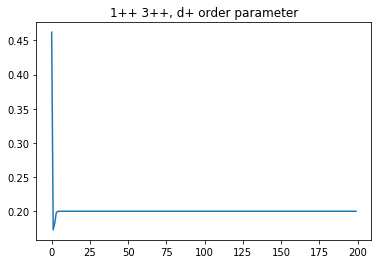

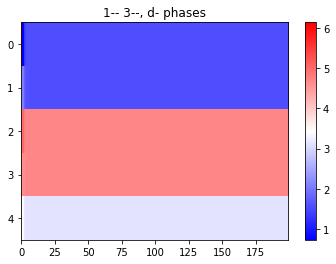

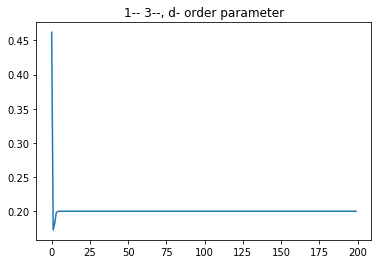

In [6]:
# cycle graph with diagonal
Nn=4
Ne=5
Nf=2

# np.random.seed(seed=4444)

# theta_0=np.pi*np.random.rand(Ne)
theta_0=(np.random.rand(Ne)-0.5)*10

# +- diag +
B0=np.zeros((Ne,Nn))
B0[0,:]=[1, -1, 0, 0]
B0[1,:]=[1, 0, 0, -1]
B0[2,:]=[0, 1, -1, 0]
B0[3,:]=[0, 0, 1, -1]
B0[4,:]=[1, 0, -1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, 0, 1, 0, -1] #e135 (n123)
B1[1,:]=[0, 1, 0, -1, -1] #e245 (n134)
print('1++ 3+-, d+')
plotflow(theta_0,B0,B1,'1++ 3+-, d+')

# # +- diag +
B0=np.zeros((Ne,Nn))
B0[0,:]=[1, -1, 0, 0]
B0[1,:]=[-1, 0, 0, 1]
B0[2,:]=[0, 1, -1, 0]
B0[3,:]=[0, 0, 1, -1]
B0[4,:]=[1, 0, -1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, 0, 1, 0, -1] #e135 (n123)
B1[1,:]=[0, 1, 0, -1, -1] #e245 (n134)
print('1+- 3+-, d+')
plotflow(theta_0,B0,B1,'1+- 3+-, d+')

# +- diag -
B0=np.zeros((Ne,Nn))
B0[0,:]=[1, -1, 0, 0]
B0[1,:]=[-1, 0, 0, 1]
B0[2,:]=[0, 1, -1, 0]
B0[3,:]=[0, 0, 1, -1]
B0[4,:]=[-1, 0, 1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, 0, 1, 0, 1] #135
B1[1,:]=[0, 1, 0, 1, -1] #245
print('1+- 3+-, d-')
plotflow(theta_0,B0,B1,'1+- 3+-, d-')

# ++(1) diag +
B0=np.zeros((Ne,Nn))
B0[0,:]=[1, -1, 0, 0]
B0[1,:]=[1, 0, 0, -1]
B0[2,:]=[0, -1, 1, 0]
B0[3,:]=[0, 0, 1, -1]
B0[4,:]=[1, 0, -1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, 0, -1, 0, -1] #135
B1[1,:]=[0, -1, 0, 1, 1] #245
print('1++ 3++, d+')
plotflow(theta_0,B0,B1,'1++ 3++, d+')

# ++(1) diag -
# B0=np.zeros((Ne,Nn))
# B0[0,:]=[1, -1, 0, 0]
# B0[1,:]=[1, 0, 0, -1]
# B0[2,:]=[0, -1, 1, 0]
# B0[3,:]=[0, 0, 1, -1]
# # B0[4,:]=[-1, 0, 1, 0]
# B1=np.zeros((Nf,Ne))
# B1[0,:]=[1, 0, -1, 0, 1] #135
# B1[1,:]=[0, -1, 0, 1, -1] #245
# print('1++ 3++, d-')
# plotflow(theta_0,B0,B1,1++ 3++, d-')

# --(1) diag +
# B0=np.zeros((Ne,Nn))
# B0[0,:]=[-1, 1, 0, 0]
# B0[1,:]=[-1, 0, 0, 1]
# B0[2,:]=[0, 1, -1, 0]
# B0[3,:]=[0, 0, -1, 1]
# B0[4,:]=[1, 0, -1, 0]
# B1=np.zeros((Nf,Ne))
# B1[0,:]=[-1, 0, 1, 0, -1] #135
# B1[1,:]=[0, 1, 0, -1, 1] #245
# print('1-- 3--, d+')
# plotflow(theta_0,B0,B1,'1-- 3--, d+')

# --(1) diag -
B0=np.zeros((Ne,Nn))
B0[0,:]=[-1, 1, 0, 0]
B0[1,:]=[-1, 0, 0, 1]
B0[2,:]=[0, 1, -1, 0]
B0[3,:]=[0, 0, -1, 1]
B0[4,:]=[-1, 0, 1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[-1, 0, 1, 0, 1] #135
B1[1,:]=[0, 1, 0, -1, -1] #245
print('1-- 3--, d-')
plotflow(theta_0,B0,B1,'1-- 3--, d-')

Siamese cycles
('\theta_0: ', array([0.68350281, 1.20533162, 1.31779473, 2.03101555, 2.46439843,
       2.3383205 , 1.60198147]))
('\theta_final: ', array([1.44620563, 1.90058225, 1.90058225, 1.90058225, 1.44620563,
       1.44620563, 0.45437662]))
('Div: ', array([0., 0., 0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([ 3.66373598e-14,  3.65818487e-14, -4.44089210e-16, -3.64153152e-14,
       -3.73034936e-14,  8.88178420e-16,  4.44089210e-16]))
('L1\theta: ', array([0., 0., 0., 0., 0., 0., 0.]))
('dim(Ker(L1)): ', 2)
('Ker(L1): ', array([[ 0.45644438, -0.24150609],
       [ 0.34794836,  0.38157385],
       [ 0.34794836,  0.38157385],
       [ 0.34794836,  0.38157385],
       [ 0.45644438, -0.24150609],
       [ 0.45644438, -0.24150609],
       [-0.10849602,  0.62307994]]))


array([1.44620563, 1.90058225, 1.90058225, 1.90058225, 1.44620563,
       1.44620563, 0.45437662])

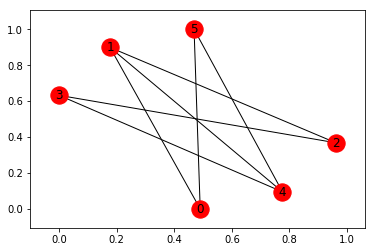

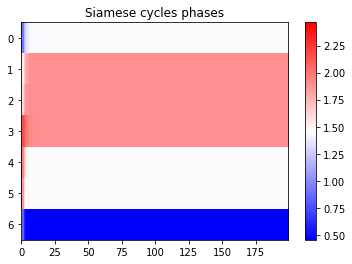

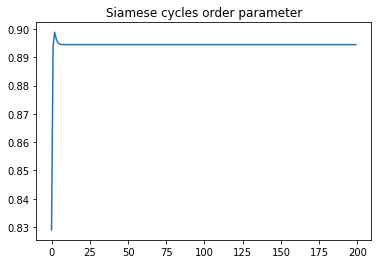

In [7]:
# 00 siamese cycles (they share an edge), one orientation, shared edge tbd
Nn=6
Ne=7

B0=np.zeros((Ne,Nn))
B0[0,:]=[-1, 1, 0, 0, 0, 0]
B0[1,:]=[0, -1, 1, 0, 0, 0]
B0[2,:]=[0, 0, -1, 1, 0, 0]
B0[3,:]=[0, 0, 0, -1, 1, 0]
B0[4,:]=[0, 0, 0, 0, -1, 1]
B0[5,:]=[1, 0, 0, 0, 0, -1]
B0[6,:]=[0, 1, 0, 0, -1, 0] #shared edge
# B0[7,:]=[0, 1, 0, -1, 0, 0]

Nf=0
B1=np.zeros((Nf,Ne))
# B1[0,:]=[0, 1, 1, 0, 0, 0, 0, 1] #135
# B1[1,:]=[0, 0, 0, 1, 0, 0, -1, -1] #245

G=nx.from_numpy_matrix(B0.T.dot(B0)-np.diag(np.diag(B0.T.dot(B0))))
nx.draw_networkx(G)

# np.random.seed(seed=4444)

theta_0=np.pi*np.random.rand(Ne)

plotflow(theta_0,B0,B1,'Siamese cycles')

barbell cycles
('\theta_0: ', array([0.4629125 , 2.16122783, 2.4701826 , 2.44063533, 2.37584926,
       1.58345339, 2.80420474, 1.25324548, 2.24833196]))
('\theta_final: ', array([1.88373957e+00, 1.88373957e+00, 1.88373957e+00, 1.88373957e+00,
       2.00418822e+00, 2.00418822e+00, 2.00418822e+00, 2.00418822e+00,
       1.04429686e-12]))
('Div: ', array([0., 0., 0., 0., 0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([ 1.25434120e-13, -1.25878209e-13, -3.64153152e-14,  3.68594044e-14,
        3.73034936e-14, -3.64153152e-14, -1.25434120e-13,  1.26322299e-13,
       -3.15123458e-13]))
('L1\theta: ', array([0., 0., 0., 0., 0., 0., 0., 0., 0.]))
('dim(Ker(L1)): ', 2)
('Ker(L1): ', array([[ 2.16982868e-01,  4.50464688e-01],
       [ 2.16982868e-01,  4.50464688e-01],
       [ 2.16982868e-01,  4.50464688e-01],
       [ 2.16982868e-01,  4.50464688e-01],
       [-4.50464688e-01,  2.16982868e-01],
       [-4.50464688e-01,  2.16982868e-01],
       [-4.50464688e-01,  2

array([1.88373957e+00, 1.88373957e+00, 1.88373957e+00, 1.88373957e+00,
       2.00418822e+00, 2.00418822e+00, 2.00418822e+00, 2.00418822e+00,
       1.04429686e-12])

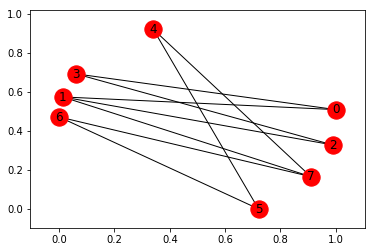

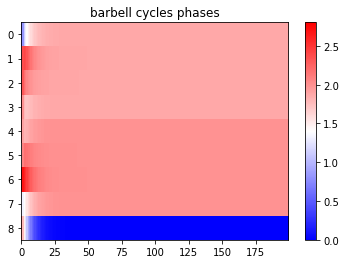

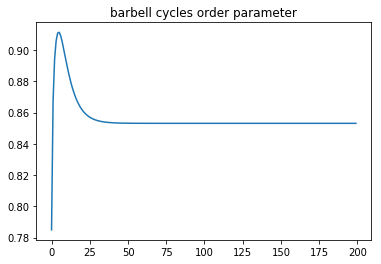

In [8]:
# 0-0 barbell cycles with single orientation
Nn=8
Ne=9
Nf=0
B0=np.zeros((Ne,Nn))
B0[0,:]=[-1, 1, 0, 0, 0, 0, 0, 0]
B0[1,:]=[0, -1, 1, 0, 0, 0, 0, 0]
B0[2,:]=[0, 0, -1, 1, 0, 0, 0, 0]
B0[3,:]=[1, 0, 0, -1, 0, 0, 0, 0]
B0[4,:]=[0, 0, 0, 0, -1, 1, 0, 0]
B0[5,:]=[0, 0, 0, 0, 0, -1, 1, 0]
B0[6,:]=[0, 0, 0, 0, 0, 0, -1, 1]
B0[7,:]=[0, 0, 0, 0, 1, 0, 0, -1]
B0[8,:]=[0, 1, 0, 0, 0, 0, 0, -1] #barbell
B1=np.zeros((Nf,Ne))

G=nx.from_numpy_matrix(B0.T.dot(B0)-np.diag(np.diag(B0.T.dot(B0))))
nx.draw_networkx(G)

# np.random.seed(seed=4444)

theta_0=np.pi*np.random.rand(Ne)
# theta_0=(np.random.rand(Ne)-0.5)*2

plotflow(theta_0,B0,B1,'barbell cycles')

In [9]:
def simplicial_kuramoto_full_theta_double(t, theta, B0d, B0dp, B0dm, B1d, B1dp, B1dm, a, omega_0):

    return omega_0-a*(B0d.dot(np.sin(B0d.T.dot(theta))))

def integrate_simplicial_kuramoto_full_theta_double(B0d, B0dp ,B0dm, B1d, B1dp, B1dm, theta_0, t_max, n_t, a, omega_0):
    
    return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta_double(t, theta, B0d, B0dp ,B0dm, B1d, B1dp, B1dm, a, omega_0), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)

edges
[[0. 1.]
 [0. 3.]
 [1. 2.]
 [2. 3.]]
faces
[]
('\theta_0: ', array([-0.0781141,  0.0781141, -0.0781141, -0.0781141,  0.0781141,
       -0.0781141,  0.0781141,  0.0781141]))
('\theta_final: ', array([-0.0781141,  0.0781141, -0.0781141, -0.0781141,  0.0781141,
       -0.0781141,  0.0781141,  0.0781141]))
('\theta_final: ', array([6.20507121, 0.0781141 , 6.20507121, 6.20507121, 0.0781141 ,
       6.20507121, 0.0781141 , 0.0781141 ]))
('Div: ', array([0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([-6.95277169e-14, -6.14786000e-14, -2.85882429e-15,  1.09079412e-14]))
('L1\theta: ', array([0., 0., 0., 0.]))
('dim(Ker(L1)): ', 1)
('Ker(L1): ', array([[-0.5],
       [ 0.5],
       [-0.5],
       [-0.5]]))


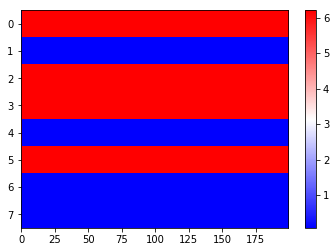

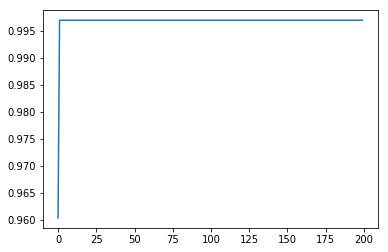

In [10]:
# Cycle with lift
Nn=10
G=nx.cycle_graph(Nn)

B0,B1=ntri(A)

# B0[1,0]=-B0[1,0]
# B0[1,-1]=-B0[1,-1]

Ne=B0.shape[0]
Nf=B1.shape[0]

V=np.concatenate((np.eye(Ne),-np.eye(Ne)),axis=0)
B0d=V.dot(B0)
B1d=B1.dot(V.T)
B0dp=(np.abs(B0d)+B0d)/2
B0dm=(np.abs(B0d)-B0d)/2
B1dp=(np.abs(B1d)+B1d)/2
B1dm=(np.abs(B1d)-B1d)/2

# np.random.seed(seed=4444)

# theta_0=np.pi*np.random.rand(Ne)
theta_0=(np.random.rand(Ne)-0.5)*1
theta_0d=V.dot(theta_0)
omega_0=np.ones(2*Ne)*0

a=1

t_max = 2000 #integration time
n_t = 200 #number of timepoints 

result=integrate_simplicial_kuramoto_full_theta_double(B0d, B0dp ,B0dm, B1d, B1dp, B1dm, theta_0d, t_max, n_t, a, omega_0)

times = result.t
theta = result.y
# theta=V.T.dot(theta)

plt.figure()
plt.imshow(np.mod(np.around(theta,10),np.around(2*np.pi,10)), aspect='auto',cmap='bwr')
plt.colorbar()

op=order_parameter(theta, 4, 1)
plt.figure()
plt.plot(op[0,:])

print('\theta_0: ',theta[:,-1])
print('\theta_final: ', theta[:,-1])
print('\theta_final: ', np.mod(np.around(theta[:,-1],10),np.around(2*np.pi,10)))

theta=V.T.dot(theta)
Div=np.mod(np.around(B0.T.dot(theta),10),np.around(2*np.pi,10))
Curl=np.mod(np.around(B1.dot(theta),10),np.around(2*np.pi,10))
print('Div: ', Div[:,-1])
print('Curl: ', Curl[:,-1])

L1=-B0.dot(B0.T)-B1.T.dot(B1)
print('L1\theta: ', L1.dot(theta[:,-1]))
print('L1\theta: ', np.mod(np.around(L1.dot(theta[:,-1]),10),np.around(2*np.pi,10)))
print('dim(Ker(L1)): ', null_space(L1).shape[1])
print('Ker(L1): ', null_space(L1))

# plt.figure()
# plt.imshow(Div, aspect='auto',cmap='bwr')
# plt.colorbar()
# plt.figure()
# plt.imshow(Curl, aspect='auto',cmap='bwr')
# plt.colorbar() 